 ## CH4 Spectra to do wavelength calibration and understand sensitvity tuning

![theory](data/absorbance.png)
$$\tilde{c} =  c \cdot \frac{\tilde{A}}{A} \cdot \frac{K_{\nu}}{K_{\tilde{\nu}}}$$

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import os
os.chdir('..')
from classes import Spectra, Observer, HiddenPrints

In [45]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'CH4_STP')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm].
                                lower =  3260.,    
                                upper =  3260.6,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses
# cell 0
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 100,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1

my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                VMR        = 100E-6)    # E-6 = ppm 

# cell 1
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 0.05,            # atm. Default is 1
                         length         = 2,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1
my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                VMR        = 0.8E-2)    # E-6 = ppm 
#%% 4. download (running hapi functions)
my_spectrum.download(line_list = False,         # by setting to false, the linelist will nor be downloaded nor plotted.
                     step      = 0.001         # The step size determines the resolution of the graph. It is in the unit of wavenumbers (1/cm).
                    )  



Using data

CH4
                     Lines parsed: 33
CO
                     Lines parsed: 13
H2O
                     Lines parsed: 79
NH3
                     Lines parsed: 34
NO2
                     Lines parsed: 66175


To double check that everything is as desired, you can print a summary of your setup.

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

Summary of the spectum CH4_STP: 
	 lower: 3260.0 [nm] 
	 upper: 3260.6 [nm] 
Gas cell 0: 
	 length: 100 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.9999, 'self': 0.0001} 
	 Gasses (VMR): 
	 	 CH4: 0.0001 
Gas cell 1: 
	 length: 2 cm | temp: 296 K|pressure: 0.05 atm|gas matrix: {'air': 0.992, 'self': 0.008} 
	 Gasses (VMR): 
	 	 CH4: 0.008 



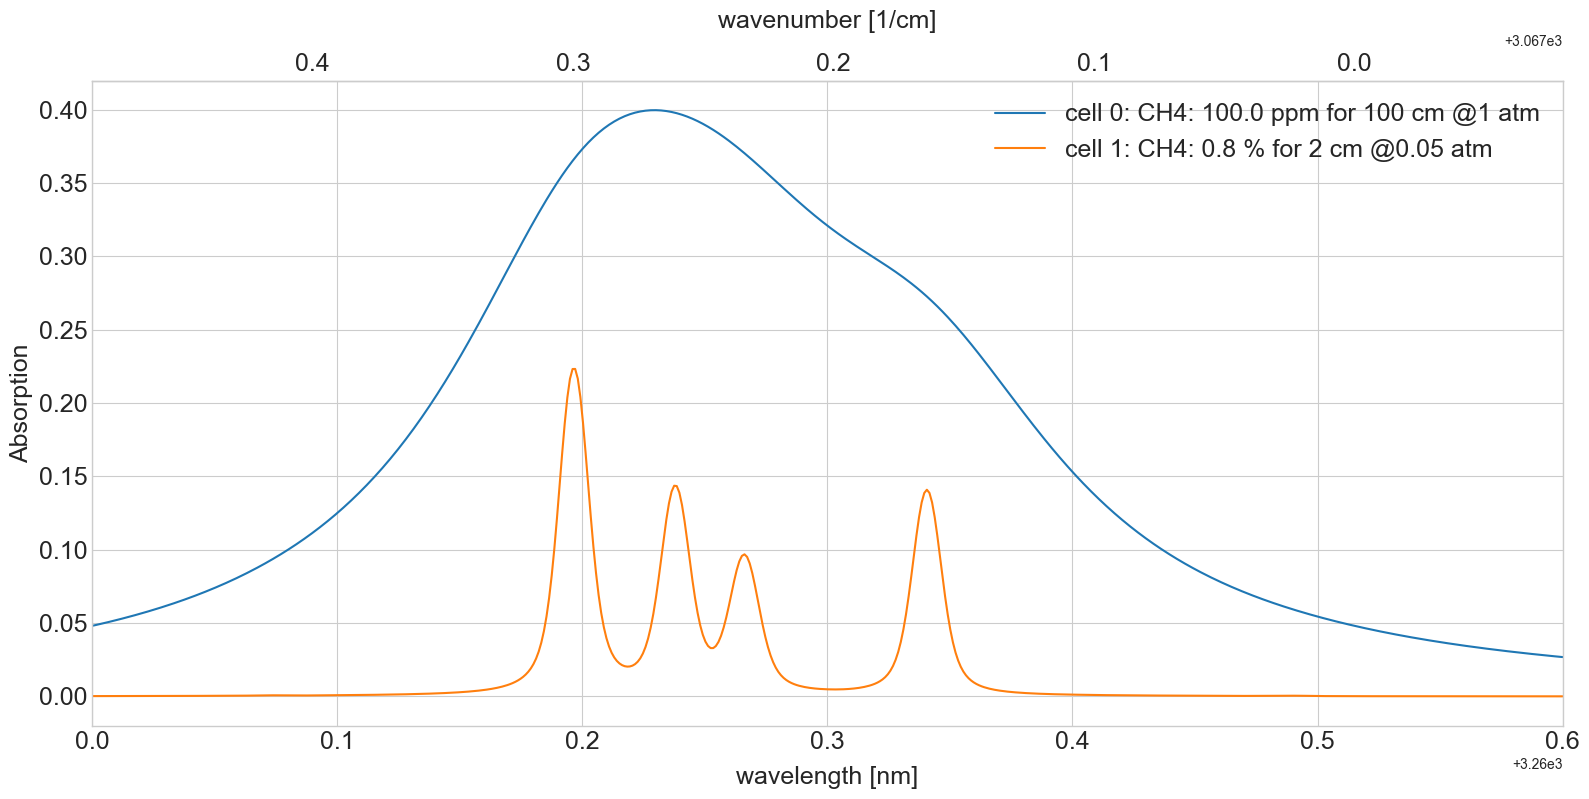

In [46]:
#%% 5. plot
my_spectrum.plot(figsize = (16,8),
                 export = True,
                 fontsize = 18,
                 absorbance = False,
                )
print(my_spectrum)

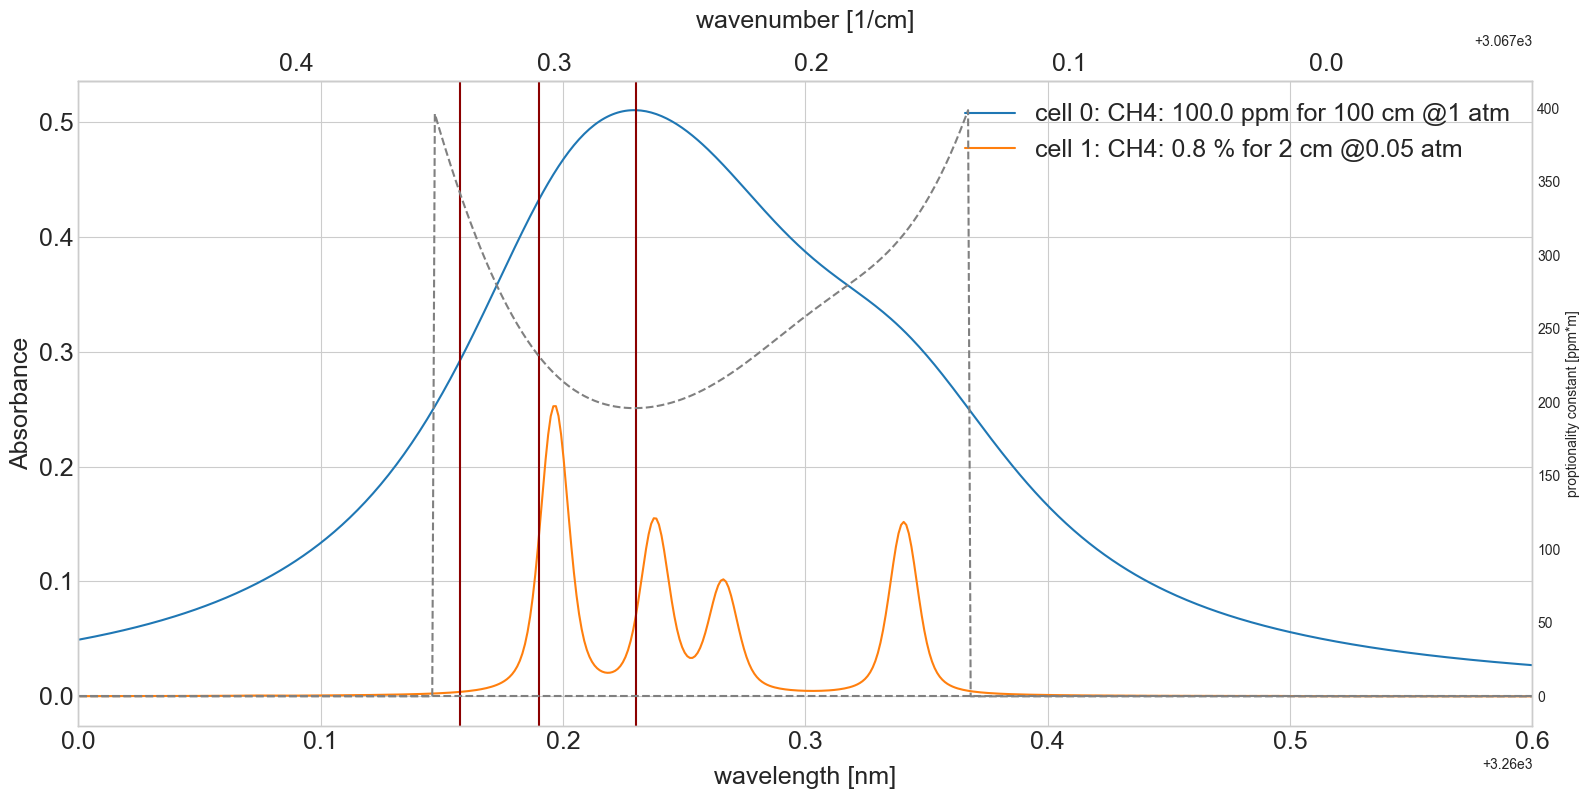

In [59]:
#%% 5. plot prop const
a = my_spectrum.plot(figsize = (16,8),
                 export = True,
                 fontsize = 18,
                 absorbance = True,
                 prop_const = True
                )
a.axvline(x=3260.15766, color = 'darkred') # fact 0.55
a.axvline(x=3260.19, color = 'darkred') # fact 0.4
a.axvline(x=3260.23, color = 'darkred') # fact 0.3

In [60]:
import numpy as np
#assumes wavelength as x units
cell = my_spectrum.gas_cells[0]
x = cell.lam
#y2 = cell.gasses[0].VMR * my_spectrum.gas_cells[0].length *1E4 / my_spectrum.gas_cells[0].absorbance
print(f'Absorbance | prop_const at 3260.23    nm (fact. 0.3) :  {np.interp(3260.23, x, cell.absorbance_lam)} | {np.interp(3260.23, x, cell.prop_const_lam)}')
print(f'Absorbance | prop_const at 3260.19    nm (fact. 0.4) :  {np.interp(3260.19, x, cell.absorbance_lam)} | {np.interp(3260.19, x, cell.prop_const_lam)}')
print(f'Absorbance | prop_const at 3260.15766 nm (fact. 0.55): {np.interp(3260.15766, x, y)} | {np.interp(3260.15766, x, cell.prop_const_lam)}')


Absorbance | prop_const at 3260.23    nm (fact. 0.3) :  0.5101401639341189 | 196.0245577018788
Absorbance | prop_const at 3260.19    nm (fact. 0.4) :  0.43186877775581745 | 231.55631030414287
Absorbance | prop_const at 3260.15766 nm (fact. 0.55): 0.29270993318194805 | 341.6431626149806


**Example equations**  
At Factor 0.3, we measure $c$ ppm*m.  
What would we measure at factor 0.4 or 0.55?  
$$\tilde{c} =  c \cdot \frac{\tilde{A}}{A} \cdot \frac{K_{\nu}}{K_{\tilde{\nu}}}$$  

$$ c_{0.4}  = c \cdot \frac{0.432}{0.51} \cdot \frac{196.02}{231.556} = c \cdot 0.71684$$  
  
$$ c_{0.55} = c \cdot \frac{0.293}{0.51} \cdot \frac{196.02}{341.64} = c \cdot 0.32951$$  

**Idea**
Place a lookuptable for prop constant $K_{\nu}$ in camera, such I would always get correct concentration values and no need to translate